### Проект: Исследование сервиса аренды самокатов GoFast. 

Описание проекта : В ходе исследования будут проанализированны данные 
которые могут помочь найти точки для роста бизнеса. Пользователи сервиса GoFast 
пользуются мобильным приложением для аренды самокатов . Сервисом можно пользоваться: без подписки , 
абонентская плата отсутствует и с подпиской. В основных данных есть информация о 
пользователях, их поездках и подписках. Планируется сравнивать 2 группы(пользователи с подпиской и без нее) пользователей по части доходности, 
а также иных дополнительных параметров влияющие на выручку компании 

План работы: 
1. Изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Итог исследования

Библмотеки для работы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
from scipy.stats import binom
import statsmodels as sm

#### Шаг 1. Загрузка данных

In [2]:
df_users = pd.read_csv('C:/Users/User/Desktop/проекты/Самокаты/users_go.csv')
df_rides = pd.read_csv('C:/Users/User/Desktop/проекты/Самокаты/rides_go.csv')
df_subscription = pd.read_csv('C:/Users/User/Desktop/проекты/Самокаты/subscriptions_go.csv')

In [3]:
#Выводим информацию о датасете
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
#Выводим первые 5 строк датасета
df_users.head()


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
#Выводим информацию о датасете
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
#Выводим первые 5 строк датасета
df_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
#Выводим информацию о датасете
df_subscription.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [8]:
#Выводим первые  строки датасета
df_subscription.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Комментарии: Первый взгляд на таблицы показывает что у нас нет пропущенны значений в таблице что уже хорошо, 
    но требуется изменить тип данны date в таблице df_rides/

#### Шаг 2. Предобработка данных

In [9]:
#Приводим в нужный тип дату а также добавим новый столбец для обозначения номера месяца
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%dT%H:%M:%S')
df_rides['month_date'] = df_rides['date'].dt.month 

In [10]:
#Выводим информацию о датасете для проверки наших изменений 
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18068 non-null  int64         
 1   distance    18068 non-null  float64       
 2   duration    18068 non-null  float64       
 3   date        18068 non-null  datetime64[ns]
 4   month_date  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [11]:
#Проверяем отдельно столбец month_date
df_rides['month_date']

0         1
1         1
2         4
3         8
4         8
         ..
18063    11
18064    11
18065    11
18066    11
18067    12
Name: month_date, Length: 18068, dtype: int64

In [12]:
#Просмотрим все уникальные значения встолбце с датой
df_rides['date'].unique()

array(['2021-01-01T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-04-20T00:00:00.000000000', '2021-08-11T00:00:00.000000000',
       '2021-08-28T00:00:00.000000000', '2021-10-09T00:00:00.000000000',
       '2021-10-19T00:00:00.000000000', '2021-11-06T00:00:00.000000000',
       '2021-11-14T00:00:00.000000000', '2021-11-22T00:00:00.000000000',
       '2021-12-14T00:00:00.000000000', '2021-12-22T00:00:00.000000000',
       '2021-03-15T00:00:00.000000000', '2021-03-18T00:00:00.000000000',
       '2021-03-23T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-06-20T00:00:00.000000000',
       '2021-07-02T00:00:00.000000000', '2021-07-18T00:00:00.000000000',
       '2021-08-03T00:00:00.000000000', '2021-10-27T00:00:00.000000000',
       '2021-12-18T00:00:00.000000000', '2021-01-31T00:00:00.000000000',
       '2021-02-24T00:00:00.000000000', '2021-02-26T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-05-07

Комментарии : Мы поменяли в таблице df_rides в строке date  тип данных datetime6. А также создали столбец  month_date с номером месяца. А также убедились что данные представлены за 2021 года 

In [13]:
#Проверим наличие пропуской в датасете
df_rides.isna().sum()

user_id       0
distance      0
duration      0
date          0
month_date    0
dtype: int64

In [14]:
#Проверим наличие пропуской в датасете
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
#Проверим наличие пропуской в датасете
df_subscription.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Коментарии  : Пропущенных значений типа Nan мы не обнаружили а значит можем приступать к исследовательскому анализу данных

In [16]:
#Проверим на наличие дублированныз записей в датасете
df_rides.duplicated().sum()

0

In [17]:
#Проверим на наличие дублированных записей в датасете
df_users.duplicated().sum()

31

In [63]:
#Проверим на наличие дублированныз записей в датасете
df_subscription.duplicated().sum()

0

In [18]:
#Удаялем дублированные записи в датасете
df_users = df_users.drop_duplicates()

In [19]:
#Убедились в отсутствии дублированных записей
df_users.duplicated().sum()

0

Комментарии: В ходе проверки на дубликаты значений в строках были обнаружены дубликаты 
в столбце df_users. Они были удалены. В целом можно сказать о хорошем качестве данных. Пропущенны хначений не оказалось . Также были удалены дубликаты.

#### Шаг 3. Исследовательский анализ данных

Text(0.5, 1.0, 'Количество пользователей в каждом городе')

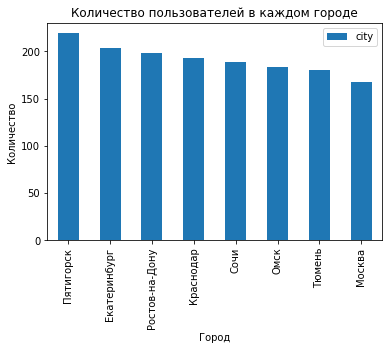

In [20]:
# Построение столбчатой диаграммы по количеству пользователей в каждом городе
df_users['city'].value_counts(ascending=False).plot.bar(x='city', y='counts', legend='False')
plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Количество пользователей в каждом городе')

Комментарий : Как видно из гистограммы частот построенной по столбцу city (города) в таблице user лидер по кличеству это город Пятигорск(упоминается чуть больше 200 раз)
    Самое малое количество это город Москва примерно до 160 раз

Text(0.5, 1.0, 'Распределение возрастов среди пользователей')

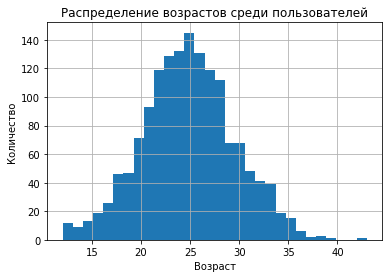

In [21]:
# Построение гистограммы распределения возврастов среди пользователей
df_users.hist(bins=30, column='age')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение возрастов среди пользователей')

In [22]:
# Просмотр основных статистик по столбцу возраста
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Комментарии : В таблице df_users нас интересует для анализа разброса данных именно столбец age(возраст). Мы видим что форма гистограммы имеет 
нормальное распределение со средним значением 25. Это ожидаемый результат так как большинство ездят на самокат именно молодые люди . График после 30 лет ожидаемо убывает 

Text(0.5, 1.0, 'Распределение время сессий аренды самокатов среди пользователей')

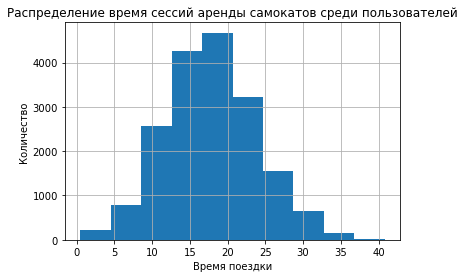

In [23]:
# Построение гистограммы распределения времени сессий аренды самокатов среди пользователей
df_rides.hist(column='duration')
plt.xlabel('Время поездки')
plt.ylabel('Количество')
plt.title('Распределение время сессий аренды самокатов среди пользователей')

In [24]:
# Просмотр основных статистик по столбцу времени поездки
df_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Комментарии  : Как видно из гистограммы частот значения в столбце duration таблицы  df_rides имеют нормальное распределение без выбросов.Среднее и медиана одинковы. В среднем поездка занимает 17 минут 

Text(0.5, 1.0, 'Распределение пройденного расстояния среди пользователей')

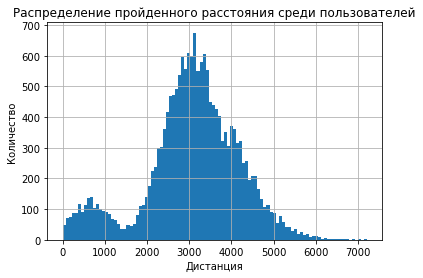

In [25]:
# Построение гистограммы распределения пройденного расстояния  среди пользователей
df_rides.hist(bins=100, column='distance')
plt.xlabel('Дистанция')
plt.ylabel('Количество')
plt.title('Распределение пройденного расстояния среди пользователей')

Комментарий  : Как видно из гистограммы частот в  среднем одна поездка занимает от 3000 до 3500 метров . Пиковое значение будет в районе 3100 метров. Данные распределены относительно нормально за исключением несколько хвостов с правой стороны .

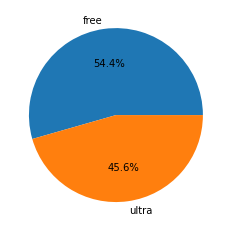

In [26]:
# Построение круговой диаграммы по доле подписки 
df_users['subscription_type'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.ylabel("")
plt.show()

Комментарий  : Пользователей с бесплатной подпиской выше чем с платной 54% против 46%. 
    Но разница не такая существенная что бы делать однозначные выводы о интересе пользовтелей к какому то конкретному типу подписки  

In [27]:
df_rides.head()

,user_id,distance,duration,date,month_date
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Шаг 4. Объединение данных

In [28]:
# Объедение датасетов 
df = df_users.merge(df_rides, on='user_id')
df_all = df.merge(df_subscription, on='subscription_type')

In [29]:
df_rides.shape

(18068, 5)

In [30]:
df_users.shape

(1534, 5)

In [31]:
df_subscription.shape

(2, 4)

In [32]:
df_all.shape

(18068, 12)

In [33]:
# Вывод на экран после объеденения
df_all.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Комментарий  : Соеденили все 3 таблицы. Количество строк соответствует количеству поездок 18068. Количество столбцов равно 12 что тоже совпадает с суммой стобцов 3 таблиц за минусом 2 по которому шло соеденение 

In [34]:
# Создаем два фрейма  в  дном пользователи с платной подпиской в другом с бесплатной 
df_ultra = df_all.query('subscription_type == "ultra"')
df_free = df_all.query('subscription_type == "free"')

In [35]:
# Вывод на экран пользователей с бесплатной подпиской
df_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [36]:
# Вывод на экран пользователей с платной подпиской
df_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month_date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Комментарий  : Создали 2 отдельных датафрейма с платной подпиской у пользователей  df_ultra и 
    беслпатной df_free

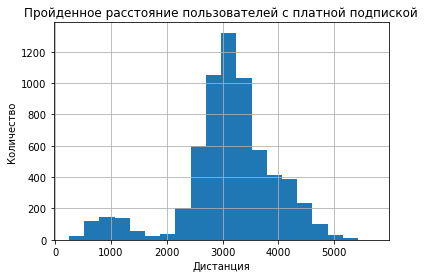

Text(0.5, 1.0, 'Пройденное расстояние пользователей без платной подписки')

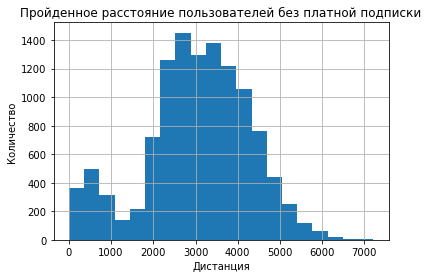

In [37]:
# Построение гистограммы распределения пользователей с платной подпиской пройденного расстояния
df_ultra.hist(bins=20, column='distance')
plt.xlabel('Дистанция')
plt.ylabel('Количество')
plt.title('Пройденное расстояние пользователей с платной подпиской')
plt.show()
# Построение гистограммы распределения пользователей с бесплатной подпиской пройденного расстояния
df_free.hist(bins=20, column='distance')
plt.xlabel('Дистанция')
plt.ylabel('Количество')
plt.title('Пройденное расстояние пользователей без платной подписки')

Комментарий  : Я поменял названия гистограмм что бы было понятнее что отображает каждая . А чем отличаются я указал в выводе ниже

In [38]:
# Просмотр статистик пользователей с платной подпиской по пройденному расстоянию
df_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [39]:
# Просмотр статистик пользователей с бесплатной подпиской по пройденному расстоянию
df_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Комментарии  :  Как мы видим из гистограмм частот по продолжительности дистанции поездок  у пользователей с платной подпиской 
пиковое значение равно 3000 (до 1250 поездок) метров и дальше идет спад.На отметке ближе 4000 метров идёт быстрый спад за одну поездку(Количество поездок снижается с 1000 до 500).
При рассмотрении гистограмм частот пользователей с бесплатной подпиской мы видим что количество поездок начинает возрастать примерно  на отметке 2300 (1200 поездок). Пиковое значение равно 2 500 около (1400 поездок).
Дальше идет плавный спад до 4000 метров (до 1000 поездок). Если рассматривать  среднее пользователей с платной подпиской (3115) и бесплатной подпиской (3045). Мы видим что в значениях средних нет большой разницы но гистограмма часто показала нам как распределын данные. В таблице с пользователями бесплатной подпиской они распределены нормально, но имеют в тоже время хвосты оттого и стандартное отклонение у него большое (1246). Гистограмма частот с платной подписке тоже ближе к нормальному , но у него нет такого сильного разброса как у пользователей с бесплатной подпиской оттого и отклоение от среднего невысокое (836)  

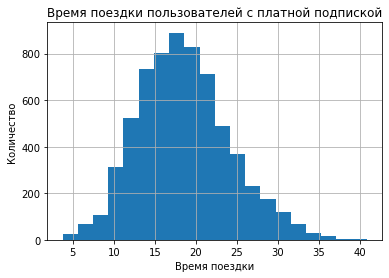

Text(0.5, 1.0, 'Время поездки пользователей с бесплатной подпиской')

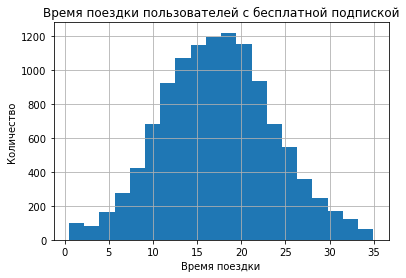

In [40]:
# Построение гистограммы распределения пользователей с платной подпиской времени поездки
df_ultra.hist(bins=20, column='duration')
plt.xlabel('Время поездки')
plt.ylabel('Количество')
plt.title('Время поездки пользователей с платной подпиской')
plt.show()
# Построение гистограммы распределения пользователей с бесплатной подпиской времени поездки
df_free.hist(bins=20, column='duration')
plt.xlabel('Время поездки')
plt.ylabel('Количество')
plt.title('Время поездки пользователей с бесплатной подпиской')

In [41]:
# Просмотр статистик пользователей с платной подпиской по времени поездки
df_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [42]:
# Просмотр статистик пользователей с бесплатной подпиской по времени поездки
df_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Комментарий  : Как видно из гистограмм частот большинство пользователей с платной подпиской продолжительность поездки занимает то 15 до 20 минут (до 850 поездок)
    пиковое значение находится на отметке примерно 17 минут. У пользователей с бесплатной подпиской тоже большинство значений лежат в пределахот 15 до 20 минут (до 1200 поездок).
    Среднее количество минут с платной подпиской составляет 18 минут  у пользователей с бесплатной подпиской 17 минут что говорит о том чтов  среднем пользователи с платной подпиской и без нее продолжительность поездки одинаковая.
    Также этому подтверждение дает медиана данных значений . С платной подпиской она равна 18 с беслпатной подпиской 17.

#### Шаг 5. Подсчёт выручки

In [43]:
# Проведем округление значений в столбце duration
df_all['duration'] = np.ceil(df_all['duration'])

In [44]:
# Создадим сводную таблицу объединенную по месяцам и дням. 
# Для каждого пользователя и месяца указаны сумма расстояния, количество имен и продолжительность
df_total = df_all.pivot_table(index=['user_id', 'month_date'], values = ['distance', 'name', 
'duration'], aggfunc={'distance': ['sum','first'], 'name': ['count','first'],'duration': ['sum','first']}).reset_index()

In [45]:
df_total.columns = df_total.columns.map(''.join)

In [46]:
# Выодим 5 значений сводной таблицы
df_total.head()

,user_id,month_date,distancefirst,distancesum,durationfirst,durationsum,namecount,namefirst
0,1,1,4409.919140,7027.511294,26.0,42.0,2,Кира
1,1,4,754.159807,754.159807,7.0,7.0,1,Кира
2,1,8,2694.783254,6723.470560,19.0,46.0,2,Кира
3,1,10,2770.890808,5809.911100,17.0,32.0,2,Кира
4,1,11,2842.118050,7003.499363,24.0,56.0,3,Кира


In [47]:
# Создадим новый датафрейм в котором оставим только нужные таблицы для нашего анализа
revenue = df_all[['user_id','subscription_fee','start_ride_price', 'minute_price', 
'subscription_type']]

In [48]:
# Объединим два фрейма к созданному ранее revenue таблицу с df_total
income_revenue = df_total.merge(revenue, on ='user_id', how = 'left')

In [49]:
# Выведем 5 первых значений фрейма
income_revenue.head()

,user_id,month_date,distancefirst,distancesum,durationfirst,durationsum,namecount,namefirst,subscription_fee,start_ride_price,minute_price,subscription_type
0,1,1,4409.91914,7027.511294,26.0,42.0,2,Кира,199,0,6,ultra
1,1,1,4409.91914,7027.511294,26.0,42.0,2,Кира,199,0,6,ultra
2,1,1,4409.91914,7027.511294,26.0,42.0,2,Кира,199,0,6,ultra
3,1,1,4409.91914,7027.511294,26.0,42.0,2,Кира,199,0,6,ultra
4,1,1,4409.91914,7027.511294,26.0,42.0,2,Кира,199,0,6,ultra


In [50]:
# Проверим количество строк в нашем  созданном фрейме
income_revenue.shape[0]

143511

In [51]:
# Удалим дубликаты
income_revenue = income_revenue.drop_duplicates()

In [52]:
# Проверим количество строк после удаление дубликатов 
income_revenue.shape[0]

11331

In [53]:
# Создаем переменную в которой рассчитаем месячную выручку
monthly_revenue = (income_revenue['start_ride_price'] * income_revenue['namecount']) + (income_revenue['minute_price'] * income_revenue['durationsum']) + income_revenue['subscription_fee']


In [54]:
# Добавим в наш фрейм столбец в которой будет отражена помесячная выручка пользователя
income_revenue['monthly_revenue'] = monthly_revenue

In [55]:
# Выводим на эквран первые 5 записей нашего фрейма после добавления нового столбца 
income_revenue.head()

,user_id,month_date,distancefirst,distancesum,durationfirst,durationsum,namecount,namefirst,subscription_fee,start_ride_price,minute_price,subscription_type,monthly_revenue
0,1,1,4409.919140,7027.511294,26.0,42.0,2,Кира,199,0,6,ultra,451.0
12,1,4,754.159807,754.159807,7.0,7.0,1,Кира,199,0,6,ultra,241.0
24,1,8,2694.783254,6723.470560,19.0,46.0,2,Кира,199,0,6,ultra,475.0
36,1,10,2770.890808,5809.911100,17.0,32.0,2,Кира,199,0,6,ultra,391.0
48,1,11,2842.118050,7003.499363,24.0,56.0,3,Кира,199,0,6,ultra,535.0


In [56]:
#  Рассчитаем среднюю месячную выручку по группам с платной и бесплатной подпиской
income_revenue.groupby('subscription_type')['monthly_revenue'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: monthly_revenue, dtype: float64

Комментарий  : Как видно из подсчетов выручки пользователи которые покупают платную подписку выручку в среднем 362 рублей в то время как пользователи без подписки 328 рубль 

#### Шаг 6. Проверка гипотез

6.1 Для начала требуетя сформулировать нулевую и альтернативную гипотезу.
Нулевая гипотеза - Среднее время поездки у пользователей с подпиской равна среднему времени поездки пользователей без подписки 
Альтернативная гипотеза - Среднее время поездки у пользователей с подпиской больше чем  среднее время поездки у пользователей без подписки

In [57]:
#  Проверка гипотезы
alpha = 0.05

results = st.ttest_ind(df_ultra['duration'], df_free['duration'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 2.5608196633291235e-34
Отвергаем нулевую гипотезу


In [58]:
#  Проверка гипотезы
print()    
print('Среднее время аренды у пользователей с подпиской:',
      round(df_ultra['duration'].mean(), 2), 'минут, а у пользователей без подписки',
      round(df_free['duration'].mean(), 2), 'минут')
print()
print('В среднем пользователи с подпиской арендуют самокат на',
      round(round(df_ultra['duration'].mean(), 2) - round(df_free['duration'].mean(), 2), 2),
      'минут больше, чем пользователи без подписки')


Среднее время аренды у пользователей с подпиской: 18.54 минут, а у пользователей без подписки 17.39 минут

В среднем пользователи с подпиской арендуют самокат на 1.15 минут больше, чем пользователи без подписки


Комментарий: Нулевая гипотеза была отвергнута . Принята альтернативная гипотеза о том что пользователи с платной подпиской в среднем время поездки больше чем у пользователей с бесплатной подпиской 

6.2 Сформулируем нулевую и альтернативную гипотезу. 
Нулевая гипотеза - Пользователи с подпиской в среднем проезжают расстояние не более 3130 метров
Альтернативная гипотеза - Пользователи с подпиской в среднем проезжают расстояние  более 3130 метров

In [59]:
#  Проверка гипотезы
distance = 3130

alpha = 0.05

results = st.ttest_1samp(
    df_ultra['distance'],
    distance
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')



p-значение: 0.16092623043004292
Не отвергаем нулевую гипотезу


Комментарий : Нулевая гипотеза не была отвергнута что дает нам уверенности предполагать в том что в среднем пользователи с подпиской не проезжаюьт более 3 130 метров

6.3. Нулевая гипотеза: пользователи с платной подпиской приносят в среднем для компании столько же 
выручки, что и пользователи без подписки. Альтернативная гипотеза: пользователи с 
платной подпиской приносят в среднем для компании больше выручки, чем пользователи без подписки.

In [60]:
#  Проверка гипотезы
ultra = income_revenue.query('subscription_type == "ultra"')
free = income_revenue.query('subscription_type == "free"')

alpha = 0.05

results = st.ttest_ind(ultra['monthly_revenue'],free['monthly_revenue'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 1.774828178795375e-39
Отвергаем нулевую гипотезу


In [61]:
print('В среднем в месяц  пользователи с платной подпиской приносят компании ',
      round(ultra['monthly_revenue'].mean(), 2), 'руб',
      ', а пользователи без подписки', round(free['monthly_revenue'].mean(), 2), 'руб')


В среднем в месяц  пользователи с платной подпиской приносят компании  362.79 руб , а пользователи без подписки 328.64 руб


In [62]:
ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4533 entries, 0 to 45499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            4533 non-null   int64  
 1   month_date         4533 non-null   int64  
 2   distancefirst      4533 non-null   float64
 3   distancesum        4533 non-null   float64
 4   durationfirst      4533 non-null   float64
 5   durationsum        4533 non-null   float64
 6   namecount          4533 non-null   int64  
 7   namefirst          4533 non-null   object 
 8   subscription_fee   4533 non-null   int64  
 9   start_ride_price   4533 non-null   int64  
 10  minute_price       4533 non-null   int64  
 11  subscription_type  4533 non-null   object 
 12  monthly_revenue    4533 non-null   float64
dtypes: float64(5), int64(6), object(2)
memory usage: 495.8+ KB


Комементарий  : Нулевая гипотеза была опровергнута . В среднем пользователи с подпиской приносят больше дохода нежели пользователи без подписки 

Общий вывод :
    Мы располагаем данными за 2021 год, больще всего данных в январе, мае и июне. Явные 
дубликаты удалены, столбцы приведены к нужному для исследования типу данных, для 
будущих расчетов добавлены необходимые столбцы.
Все данные разделены на три датафрейма: данные о пользователях, данные о поездках, 
данные о подписках. Всего у нас 1534 пользователя. Данные включают в себя 8 городов: 
Омск, Москва, Ростов-на-Дону, Сочи, Пятигорск, Тюмень, Екатеринбург, Краснодар. 
Больше всего пользователей пользуются мобильным приложением в Пятигорске - 219, 
меньше всего в Москве - 168. Из них тех, кто не пользуется подпиской больше примерно на 
8%, чем тех, кто с подпиской. Из пользователей заметен разброс по возрасту от 12 до 43 х 
лет. Больше всего пользуются самокатами в возрасте от 21 до 30 лет, с пиком в районе 25 
лет. Наиболее частый диапозон преодоленного расстояния за одну поездку- 2500 - 3500 
метров с пиком около 3000 метров. В среднем пользователи берут в прокат самокаты в 
интервале от 10 до 25 мин., но пользователи с подпиской делают это намного чаще. 
Пользователи, кто не пользуется подпиской, берут в основном самокаты на более 
длительное расстояние, чем те, у кого есть подписка. В среднем в месяц пользователи с 
платной подпиской приносят компании 364.0 руб , а пользователи без подписки 331.48 руб.
Были проверены три гипотезы:
1.Среднее время аренды самокатов у пользователей с платной подпиской равно времени 
аренды самокатов у пользователей без подписки. Гипотезу отвергаем. Среднее время 
аренды у пользователей с подпиской: 18.54 минут, а у пользователей без подписки 17.39 
минут. В среднем пользователи с подпиской арендуют самокат на 1.15 минут больше, чем 
пользователи без подписки.
2.Расстояние, которое проезжают пользователи с подпиской, не превышает оптимального 
расстояния в 3130 м. Гипотезу не отвергаем.В среднем платные пользователи проезжают 
3115.45 метров.
3.Пользователи с платной подпиской приносят компании столько же выручки, что и 
пользователи без подписки. Гипотезу отвергаем. В среднем в месяц пользователи с платной 
подпиской приносят компании 364.0 руб , а пользователи без подписки 331.48 руб.